<a href="https://colab.research.google.com/github/pujitha9908/python_data_visualization/blob/main/coffee_shop_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_excel("/content/Coffee Shop Sales.xlsx")

In [ ]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue
0,1,2023-01-01,0.295961,2.0,5.0,Lower Manhattan,32.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,0.297870,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,0.301435,2.0,5.0,x,59.0,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,6.0
3,4,2023-01-01,0.305833,1.0,5.0,Lower Manhattan,22.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,0.307419,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.0


In [ ]:
data.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue
149112,149453,2023-06-30,0.850810,2.0,8.0,Hell's Kitchen,49.0,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.0
149113,149454,2023-06-30,0.855255,1.0,8.0,Hell's Kitchen,45.0,3.00,Tea,Brewed herbal tea,Peppermint Lg,6.0
149114,149455,2023-06-30,0.873137,1.0,8.0,Hell's Kitchen,40.0,3.75,Coffee,Barista Espresso,Cappuccino,6.0
149115,149456,2023-06-30,0.873137,2.0,8.0,Hell's Kitchen,64.0,0.80,Flavours,Regular syrup,Hazelnut syrup,6.0
149116,Total,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149116,NaN


In [ ]:
data.isnull().sum()

,0
transaction_id,0
transaction_date,1
transaction_time,1
transaction_qty,1
store_id,1
store_location,1
product_id,1
unit_price,1
product_category,1
product_type,1


In [ ]:
data['transaction_qty'].fillna(data['transaction_qty'].mean(), inplace=True)
data['transaction_date'].fillna(data['transaction_date'].mean(),inplace = True)
data['transaction_time'].fillna(data['transaction_date'].mean(), inplace=True)
data['store_id'].fillna(data['store_id'].mean(),inplace=True)
data['product_id'].fillna(data['product_id'].mean(),inplace=True)


<ipython-input-23-0f44e513bf25>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['transaction_qty'].fillna(data['transaction_qty'].mean(), inplace=True)
<ipython-input-23-0f44e513bf25>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
data.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,1
product_id,0
unit_price,1
product_category,1
product_type,1


In [ ]:
data = data.dropna(subset=['unit_price', 'store_location', 'product_category', 'revenue'])


In [ ]:
data.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [ ]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue
0,1,2023-01-01,0.295961,2.0,5.0,Lower Manhattan,32.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,0.29787,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,0.301435,2.0,5.0,x,59.0,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,6.0
3,4,2023-01-01,0.305833,1.0,5.0,Lower Manhattan,22.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,0.307419,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.0


In [ ]:
data.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue
149111,149452,2023-06-30,0.846308,2.0,8.0,Hell's Kitchen,44.0,2.50,Tea,Brewed herbal tea,Peppermint Rg,6.0
149112,149453,2023-06-30,0.85081,2.0,8.0,Hell's Kitchen,49.0,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.0
149113,149454,2023-06-30,0.855255,1.0,8.0,Hell's Kitchen,45.0,3.00,Tea,Brewed herbal tea,Peppermint Lg,6.0
149114,149455,2023-06-30,0.873137,1.0,8.0,Hell's Kitchen,40.0,3.75,Coffee,Barista Espresso,Cappuccino,6.0
149115,149456,2023-06-30,0.873137,2.0,8.0,Hell's Kitchen,64.0,0.80,Flavours,Regular syrup,Hazelnut syrup,6.0


In [ ]:
data.shape

(149116, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149116 entries, 0 to 149115
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  object        
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  float64       
 4   store_id          149116 non-null  float64       
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  float64       
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  revenue           149116 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 14.8+ MB


In [ ]:
data.describe()

,transaction_date,transaction_qty,store_id,product_id,unit_price,revenue
count,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219,5.999975
min,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000,2.000000
25%,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000,6.000000
50%,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000,6.000000
75%,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000,6.000000
max,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000,6.200000
std,NaN,0.542509,2.074241,17.930020,2.658723,0.010371


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
data =['transaction_date','transaction_qty','store_id','product_id','unit_price','revenue']
plt.title('coffe shop sales')
plt.piechart(x,labels=y,autopct='%1.1f%%')
plt.show()

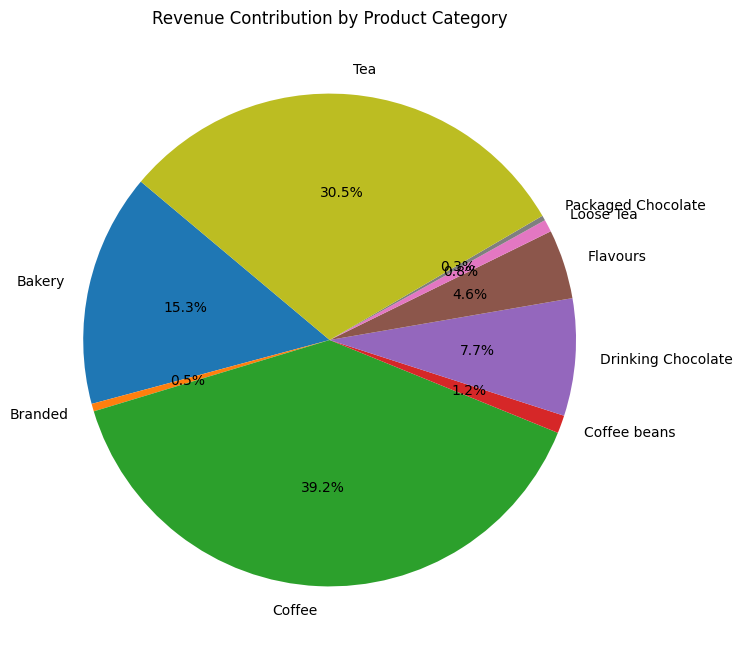

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (replace 'sales_data.csv' with your actual file)
data = pd.read_excel("/content/Coffee Shop Sales.xlsx")

# Group by product category and sum revenue
category_revenue = data.groupby('product_category')['revenue'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_revenue, labels=category_revenue.index, autopct='%1.1f%%', startangle=140)

# Title and display
plt.title('Revenue Contribution by Product Category')
plt.show()


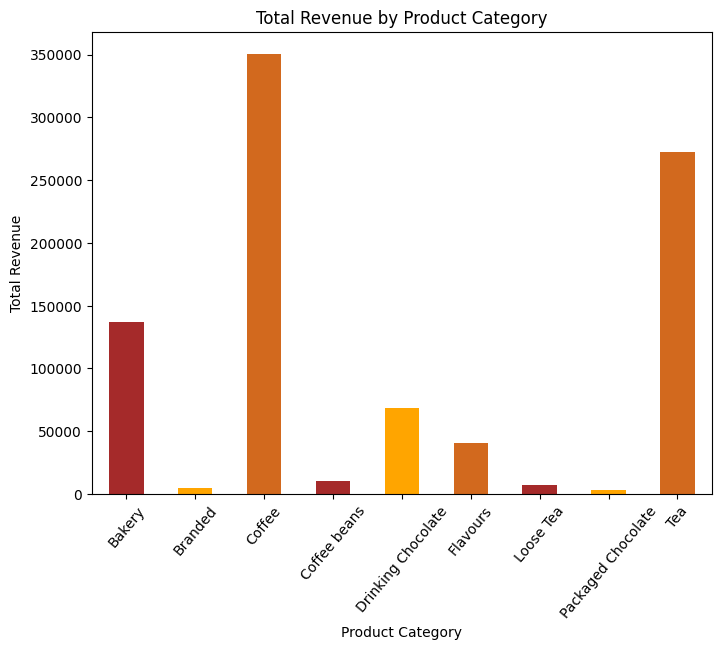

In [ ]:
# Bar plot
plt.figure(figsize=(8, 6))
category_revenue.plot(kind="bar", color=["brown", "orange", "chocolate"])  # Custom colors

# Labels and title
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Product Category")
plt.xticks(rotation=50)  # Rotate x-axis labels for readability

# Show plot
plt.show()
